# Modeling, Evaluation & Business Decisions

# Objective
This phase focuses on:
- Evaluating churn models using business-relevant metrics
- Improving recall for churners
- Comparing baseline vs advanced models
- Extracting actionable business insights

Accuracy alone is insufficient; we optimize for customer retention impact.

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib
import os


In [3]:
df = pd.read_csv("../data/processed/cleaned_telco.csv")

X = df.drop("Churn", axis=1)
y = df["Churn"]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [5]:
pipeline = joblib.load("../models/churn_pipeline.pkl")


In [22]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.8402697047198325
              precision    recall  f1-score   support

           0       0.85      0.89      0.86      1035
           1       0.63      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [8]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))


Accuracy : 0.7970191625266146
Precision: 0.6349693251533742
Recall   : 0.553475935828877
F1 Score : 0.5914285714285714
ROC AUC  : 0.8402697047198325


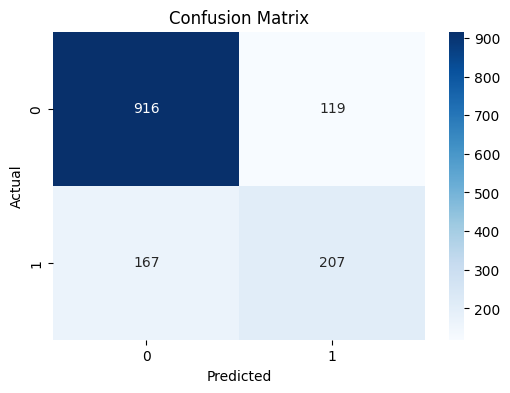

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [10]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.89      0.86      1035
           1       0.63      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [12]:

pipeline = joblib.load("../models/churn_pipeline.pkl")

In [15]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.8402697047198325
              precision    recall  f1-score   support

           0       0.85      0.89      0.86      1035
           1       0.63      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



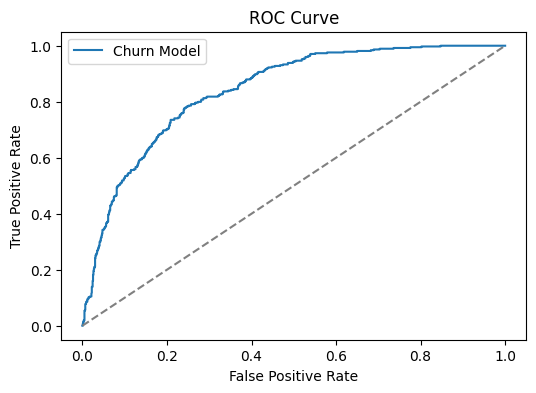

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Churn Model")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



In [24]:
thresholds = np.arange(0.2, 0.8, 0.05)

print("Recall at different thresholds:")
for t in thresholds:
    preds = (y_proba >= t).astype(int)
    recall = classification_report(y_test, preds, output_dict=True)['1']['recall']
    print(f"Threshold {t:.2f} → Churn Recall: {recall:.2f}")



Recall at different thresholds:
Threshold 0.20 → Churn Recall: 0.88
Threshold 0.25 → Churn Recall: 0.82
Threshold 0.30 → Churn Recall: 0.79
Threshold 0.35 → Churn Recall: 0.74
Threshold 0.40 → Churn Recall: 0.70
Threshold 0.45 → Churn Recall: 0.63
Threshold 0.50 → Churn Recall: 0.55
Threshold 0.55 → Churn Recall: 0.47
Threshold 0.60 → Churn Recall: 0.37
Threshold 0.65 → Churn Recall: 0.28
Threshold 0.70 → Churn Recall: 0.14
Threshold 0.75 → Churn Recall: 0.04
Threshold 0.80 → Churn Recall: 0.00


### Threshold Selection Rationale

In churn prediction, recall is prioritized over precision because missing a churn-prone customer has higher business cost than offering a retention incentive to a loyal customer.

In [26]:
os.makedirs("../models", exist_ok=True)
joblib.dump(pipeline, "../models/churn_rf_pipeline.pkl")


['../models/churn_rf_pipeline.pkl']

In [28]:
import os

# Create the folder if it doesn't exist
os.makedirs("../data/evaluation", exist_ok=True)

# Now save the evaluation results
eval_df.to_csv("../data/evaluation/eval_results.csv", index=False)
print("Evaluation results saved successfully!")


Evaluation results saved successfully!


In [29]:
# Save predictions for reporting
eval_df = X_test.copy()
eval_df['ActualChurn'] = y_test
eval_df['PredictedChurn'] = y_pred
eval_df['ChurnProbability'] = y_proba

eval_df.to_csv("../data/evaluation/eval_results.csv", index=False)
